**This notebook loads the pre-trained classifier model and a small set of test data to predict the labels on**

In [8]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import PIL
import random
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, f1_score, make_scorer, confusion_matrix
from collections import defaultdict
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from time import time, perf_counter, perf_counter_ns
from sklearn.svm import SVC
from os import listdir
from joblib import dump, load

In [9]:
#Load PCA, SVC Model, and Test Data
path = ""
pca_fn = "PCA_small.joblib"
svc_fn = "SVC_small.joblib"
testdata_fn = "XY_Test_small.npz"
pca = load(path + pca_fn)
svc = load(path + svc_fn)
npz = np.load(path + testdata_fn)
X_test = npz[npz.files[0]]
y_test = npz[npz.files[1]]

F1 Score -> 0.284398388025331
              precision    recall  f1-score   support

           C       0.18      0.74      0.28       670
           U       0.87      0.35      0.50      3537

    accuracy                           0.41      4207
   macro avg       0.53      0.54      0.39      4207
weighted avg       0.76      0.41      0.46      4207



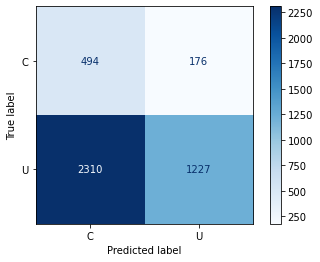

In [10]:
X_test_pca = pca.transform(X_test)
y_pred = svc.predict(X_test_pca)
#F1 Score
f1 = f1_score(y_test, y_pred, pos_label='C')
print("F1 Score ->", f1)
#Classification report
report = metrics.classification_report(y_test, y_pred, labels=['C','U'])
print(report)
#Plot the confusion matrix
conf = confusion_matrix(y_test, y_pred, labels=['C','U'])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['C','U'])
disp.plot(cmap=plt.cm.Blues)